In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('most_subscribed_youtube_channels.csv')
df.head()

,rank,Youtuber,subscribers,video views,video count,category,started
0,1,T-Series,"222,000,000","198,459,090,822","17,317",Music,2006
1,2,YouTube Movies,"154,000,000",0,0,Film & Animation,2015
2,3,Cocomelon - Nursery Rhymes,"140,000,000","135,481,339,848",786,Education,2006
3,4,SET India,"139,000,000","125,764,252,686","91,271",Shows,2006
4,5,Music,"116,000,000",0,0,NaN,2013


In [32]:
df['subscribers'] = pd.to_numeric(df['subscribers'].str.replace(',', ''), errors = 'coerce')
df['video views'] = pd.to_numeric(df['video views'].str.replace(',', ''), errors = 'coerce')
df['video count'] = pd.to_numeric(df['video count'].str.replace(',', ''), errors = 'coerce')

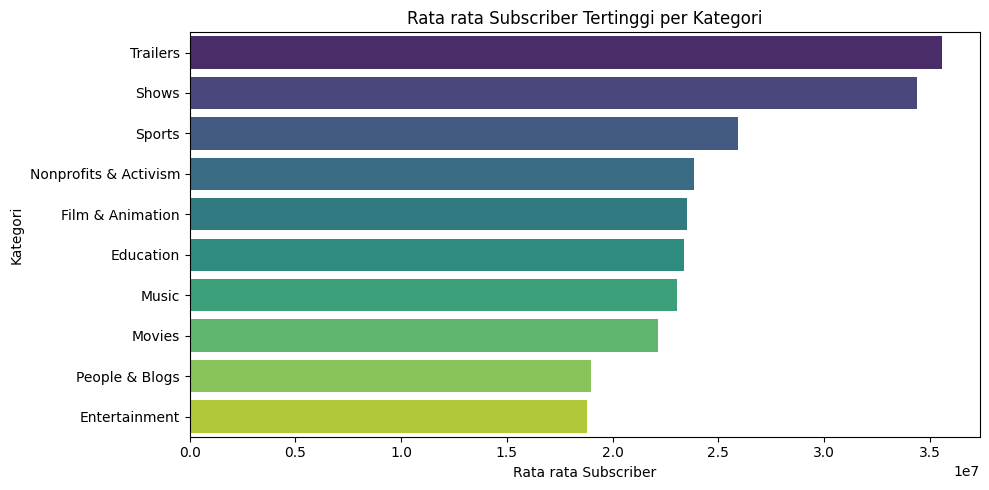

In [33]:
avg_subs_by_category = df.groupby('category')['subscribers'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x = avg_subs_by_category.values, y = avg_subs_by_category.index, hue = avg_subs_by_category.index, palette = 'viridis', legend = False)
plt.title("Rata rata Subscriber Tertinggi per Kategori")
plt.xlabel("Rata rata Subscriber")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show()

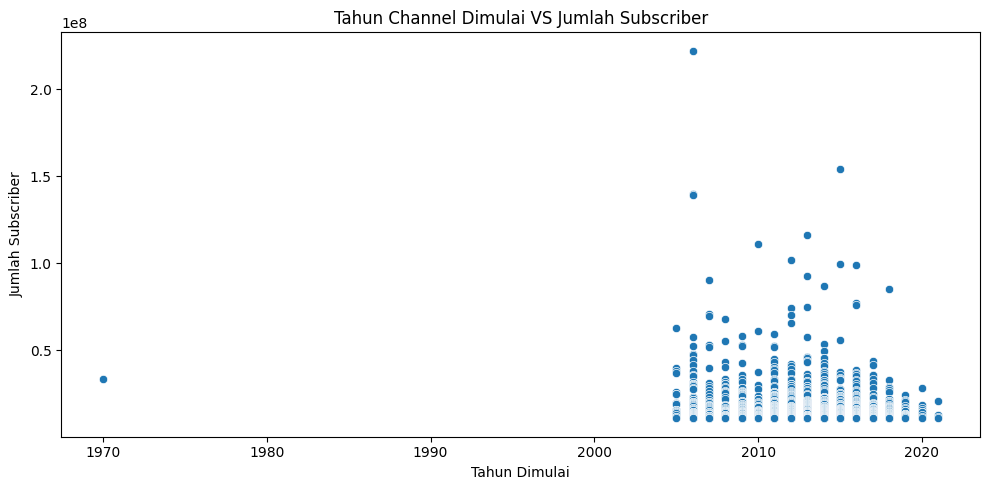

In [34]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'started', y = 'subscribers')
plt.title("Tahun Channel Dimulai VS Jumlah Subscriber")
plt.xlabel("Tahun Dimulai")
plt.ylabel("Jumlah Subscriber")
plt.tight_layout()
plt.show()

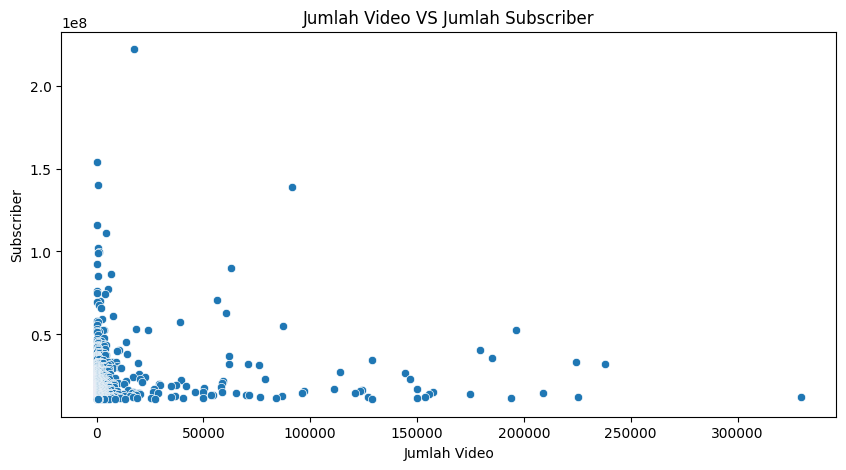

In [35]:
plt.figure(figsize = (10, 5))
sns.scatterplot(data = df, x = 'video count', y = 'subscribers')
plt.title("Jumlah Video VS Jumlah Subscriber")
plt.xlabel("Jumlah Video")
plt.ylabel("Subscriber")
plt.tight_layout
plt.show()

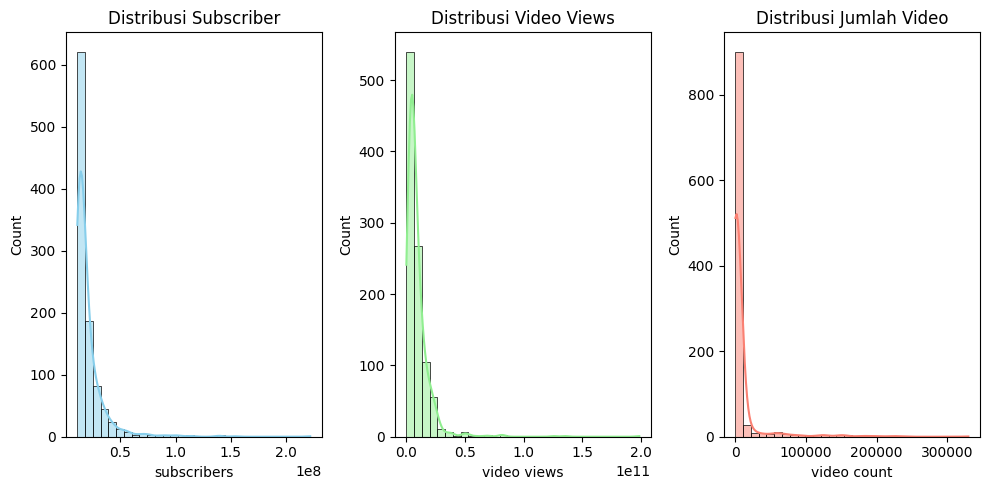

In [36]:
fig, axes = plt.subplots(1, 3, figsize = (10, 5))
sns.histplot(df['subscribers'], bins = 30, ax = axes[0], kde = True, color = 'skyblue')
axes[0].set_title('Distribusi Subscriber')

sns.histplot(df['video views'], bins = 30, ax = axes[1], kde = True, color = 'lightgreen')
axes[1].set_title('Distribusi Video Views')

sns.histplot(df['video count'], bins = 30, ax = axes[2], kde = True, color = 'salmon')
axes[2].set_title('Distribusi Jumlah Video')


plt.tight_layout()
plt.show()

In [37]:
print("Channel Tertua :")
print(df[df['started'] == df['started'].min()][['Youtuber', 'started']])

print("\n")

print("Channel Terbaru :")
print(df[df['started'] == df['started'].max()][['Youtuber', 'started']])

Channel Tertua :
   Youtuber  started
99  YouTube     1970


Channel Terbaru :
               Youtuber  started
281  MrBeast en Español     2021
726                SMOL     2021
840          Azhan5star     2021
941    Marta and Rustam     2021


In [38]:
threshold_subs = df['subscribers'].quantile(0.99)
threshold_views = df['video views'].quantile(0.99)

outliers = df[(df['subscribers'] > threshold_subs) | (df['video views'] > threshold_views)]
print("\nOutlier Channel (Top 1% Subscriber atau Views)")
print(outliers[['Youtuber', 'subscribers', 'video views']].sort_values(by = 'subscribers', ascending = False))


Outlier Channel (Top 1% Subscriber atau Views)
                      Youtuber  subscribers   video views
0                     T-Series    222000000  198459090822
1               YouTube Movies    154000000             0
2   Cocomelon - Nursery Rhymes    140000000  135481339848
3                    SET India    139000000  125764252686
4                        Music    116000000             0
5                    PewDiePie    111000000   28469458228
6                      MrBeast    102000000   16832456681
7            ✿ Kids Diana Show     99700000   79602288245
8                  Like Nastya     99200000   81963845811
9                       Gaming     92700000             0
10                         WWE     90200000   70544743313
12               Vlad and Niki     85100000   66498762660
17                    Sony SAB     70600000   82473581441
27                  Movieclips     57600000   58839819120
29                   Colors TV     55100000   52611504230


In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import numpy as np

In [40]:
df['category'] = df['category'].fillna('Unknown')

In [41]:
CURRENT_YEAR = 2025
df['age'] = CURRENT_YEAR - df['started']

In [42]:
feature_cols = ['video views', 'video count', 'age', 'category']
target_col   = 'subscribers'

In [43]:
X = df[feature_cols]
y = df[target_col]

In [44]:
numeric_feats      = ['video views', 'video count', 'age']
categorical_feats  = ['category']

numeric_pipeline = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler())
])

In [45]:
preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_pipeline, numeric_feats),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_feats)
    ])

In [46]:
rf = RandomForestRegressor(random_state=42)
pipe = Pipeline(steps=[('prep', preprocess),
                      ('model', rf)])

param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [None, 20]
}

In [47]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, shuffle=True, random_state=42)

In [48]:
gs = GridSearchCV(pipe, param_grid, cv=5, scoring='r2', n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('log',
                                                                                          FunctionTransformer(func=<ufunc 'log1p'>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['video '
                                                                          'views',
                                                                          'video '
                                                                          'count',
                                                                          'age']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['category'])])),
                                       ('model',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 20],
                         'model__n_estimators': [200, 400]},
             scoring='r2')

In [49]:
best_model = gs.best_estimator_

In [50]:
y_pred = best_model.predict(X_test)
print("Best params :", gs.best_params_)
print("R²  :", round(r2_score(y_test, y_pred), 3))
print("MAE :", round(mean_absolute_error(y_test, y_pred), 0))

Best params : {'model__max_depth': 20, 'model__n_estimators': 200}
R²  : 0.265
MAE : 5419634.0


In [51]:
youtube_test = X_test.copy()
youtube_test.to_csv("youtube_test.csv", index=False)

In [52]:
submission = youtube_test.copy()
submission['predicted_subscribers'] = np.round(y_pred).astype(int)
submission.to_csv("submission.csv", index=False)

In [53]:
import joblib

In [60]:
print("File tersimpan:")
print(" - youtube_test.csv")
print(" - submission.csv")

File tersimpan:
 - youtube_test.csv
 - submission.csv


In [56]:
sbms = pd.read_csv('submission.csv')
sbms.head()

,video views,video count,age,category,predicted_subscribers
0,1535589708,1186,8,Gaming,11956187
1,1609903713,393,8,People & Blogs,12150984
2,19472063469,1617,6,Entertainment,28746000
3,5801199256,4452,11,Gaming,15917783
4,4808457361,6686,16,Gaming,13912096


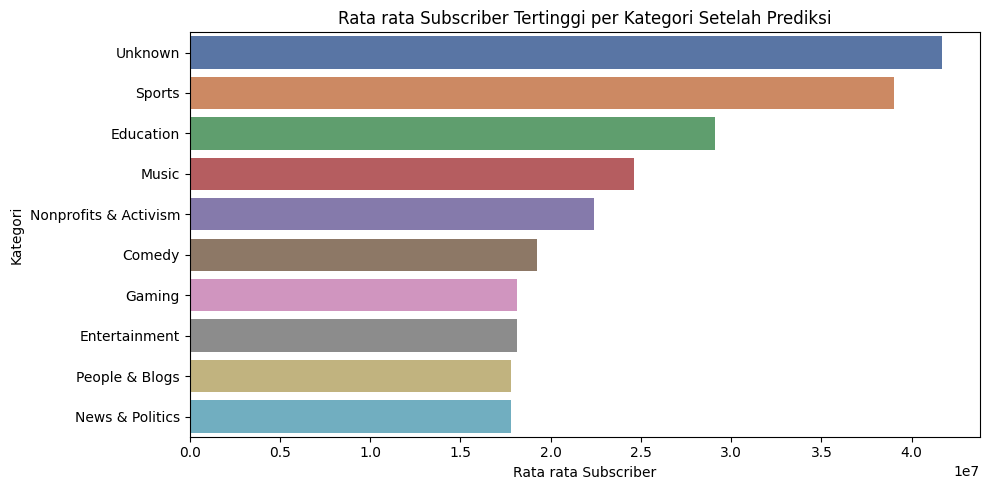

In [57]:
avg_subs_by_category = sbms.groupby('category')['predicted_subscribers'].mean().sort_values(ascending = False).head(10)
plt.figure(figsize = (10, 5))
sns.barplot(x = avg_subs_by_category.values, y = avg_subs_by_category.index, hue = avg_subs_by_category.index, palette = 'deep', legend = False)
plt.title("Rata rata Subscriber Tertinggi per Kategori Setelah Prediksi")
plt.xlabel("Rata rata Subscriber")
plt.ylabel("Kategori")
plt.tight_layout()
plt.show()